In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Agnel/25MCAB02/Placement-Career-System/data/raw/Campus_Selection.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
df.shape

(215, 14)

In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  
0     Sci&Tech     No   

In [7]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [3]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [4]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

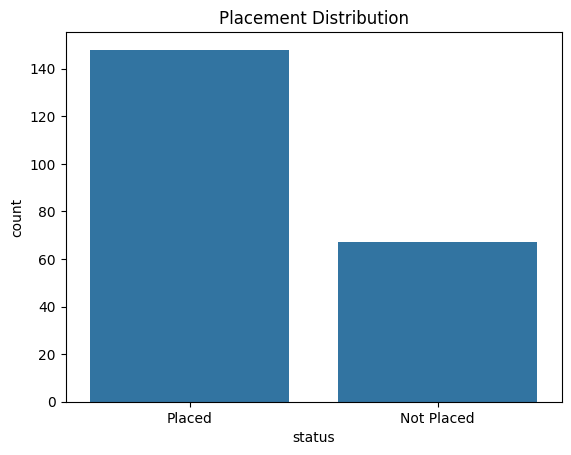

In [5]:
sns.countplot(x='status', data=df)
plt.title("Placement Distribution")
plt.show()


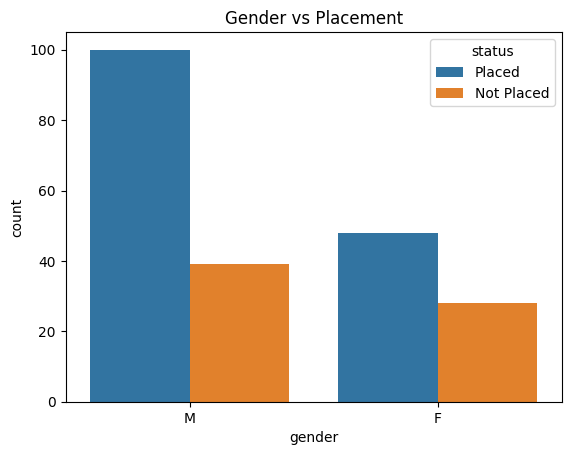

In [6]:
sns.countplot(x='gender', hue='status', data=df)
plt.title("Gender vs Placement")
plt.show()


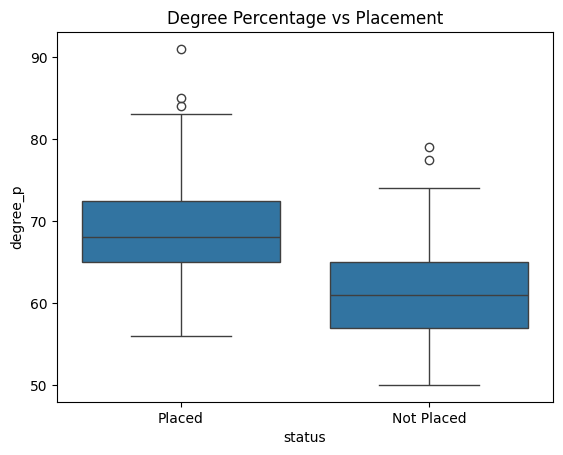

In [7]:
sns.boxplot(x='status', y='degree_p', data=df)
plt.title("Degree Percentage vs Placement")
plt.show()


In [8]:
df_encoded = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])


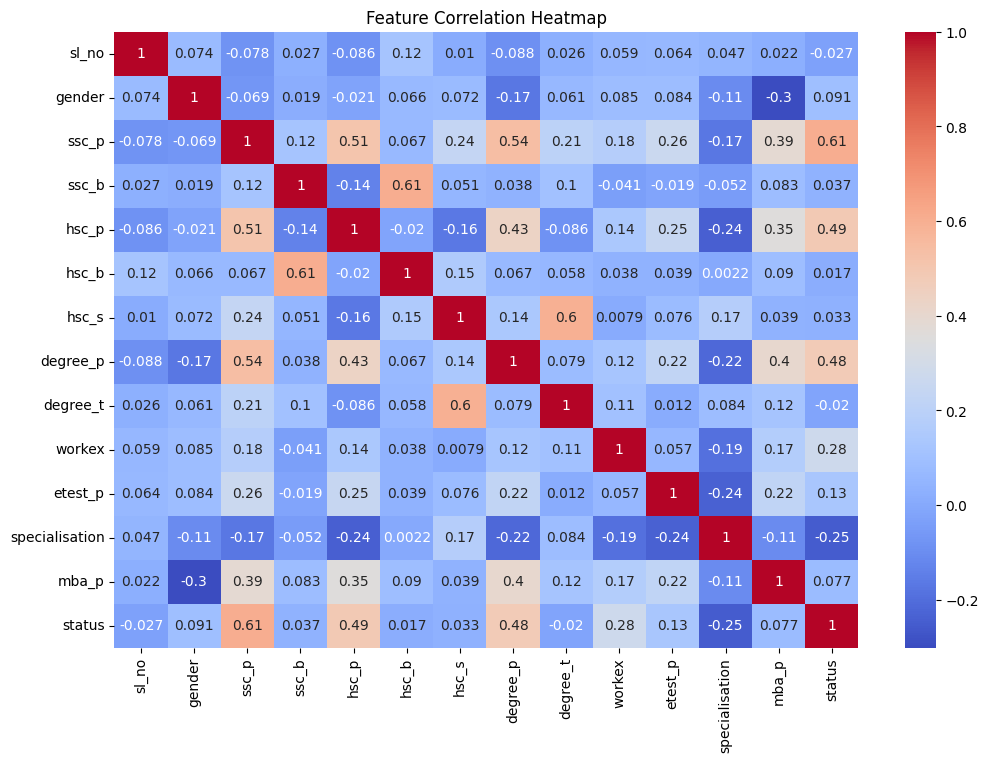

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
features = ['degree_p', 'etest_p', 'mba_p', 'workex']
target = 'status'


In [12]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')

In [13]:
X = df.drop('status', axis=1)
y = df['status']


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])


In [15]:
X.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [16]:
y.value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [17]:
X = X.drop('sl_no', axis=1)


In [18]:
X.shape
X.columns


Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [19]:
X.shape

(215, 12)